# Introduction

## Diabetes Prediction

Le but de ce projet est de **prédire la présence de diabète chez une personne** (variable `Outcome`) en fonction de divers paramètres tels que la pression sanguine, le body-mass index (BMI), etc.

Pour plus de précision sur les data, voir le lien suivant:<br>
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## Exercice


### Load Data
1. Loadez et examinez les data.<br>
   ```
   df = pd.read_csv('./data/diabetes.csv')
   ```


### Data Analysis
2. Vérifiez s'il existe des data dupliquées ou manquantes:<br>
   ```
   train_df.duplicated().sum()
   train_df.isna().values.sum()
   ```

3. Vérifiez s'il existe des data qui valent 0:<br>
   ```
   (df == 0).sum()
   ```


4. Dans les colonnes où cela est pertinent, remplacez les 0 par la moyennes des valeurs non nulle:<br>
   https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html<br>
   **Remarque:** cette pratique, appelée **imputing** s'effectue normalement après le train-test split...


5. Visualisez la répartition des valeurs de la variable `Outcome`:<br> 
   ```
   ...
   sns.countplot(y_train, order=y_train.value_counts().index)
   plt.xticks(rotation = 15)
   ...
   ```
   
6. Visualisez la répartition des valeurs de la variable `Glucose`:<br> 
   ```
   ...
   plt.scatter(df.index, df.Glucose, c=df.Outcome)
   ...
   ```


### > Problème de classification
### Train-Test Split
7. Spittez les data en un **train set** et un **test set** selon les proportions 80% / 20%.<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
   ```
   X_train, X_test, y_train, y_test = train_test_split(...)
   ```
   Comprenez ce que vous êtes en train de faire.


### Model and Results
8. Instanciez et entraînez une **régression logistique** `LogisticRegression` sur vos data (nous verrons ce modèle plus en détails par la suite):<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html<br>
    Le processus s'effectue en 3 étapes:
    1. Instanciation du modèle
    2. Entraînement du modèle sur le train set (méthode `fit(...)`)
    3. Prédictions et évaluation sur le test set


9. Calculez ensuite le **rapport de classification** de votre modèle sur le test set:<br>
    Que représentent la **precision**, le **recall**, l'**accuracy** et le **F1-score**?<br>
    https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html<br>    
    

### > Problème de régression
### Train-Test Split
10. Spittez les data en un **train set** et un **test set** selon les proportions 80% / 20%.<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html#sklearn.model_selection.train_test_split
   ```
   X_train, X_test, y_train, y_test = train_test_split(...)
   ```
   Comprenez ce que vous êtes en train de faire.


### Model and Results
11. Instanciez et entraînez une **régression linéaire** `LinearRegression` sur vos data (nous verrons ce modèle plus en détails par la suite):<br>
   https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html<br>
    Le processus s'effectue en 3 étapes:
    1. Instanciation du modèle
    2. Entraînement du modèle sur le train set (méthode `fit(...)`)
    3. Prédictions et évaluation sur le test set


12. Faites le graphique des `y` que vous avez prédits sur le test set en fonction des vraies valeurs `y_test`.<br>
   Ce graphique devrrait avoir une allure diagonale, pourquoi? Est-ce le cas ici?

## Libraries

In [125]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Load Data

In [126]:
df = pd.read_csv('./data/diabetes.csv')

In [127]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [128]:
df.shape

(768, 9)

## Data Analysis

In [129]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [130]:
df.duplicated().sum()

0

In [131]:
(df == 0).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [132]:
for col in ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]:
    
    mask = df[col] != 0
    mean = df[mask][col].mean()
    df[col] = df[col].replace(0, mean)

In [133]:
(df == 0).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                       0
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

[]

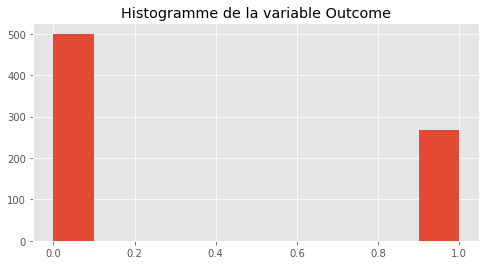

In [134]:
plt.figure(figsize=(8, 4))

df.Outcome.hist()

plt.title("Histogramme de la variable Outcome")
plt.plot()

[]

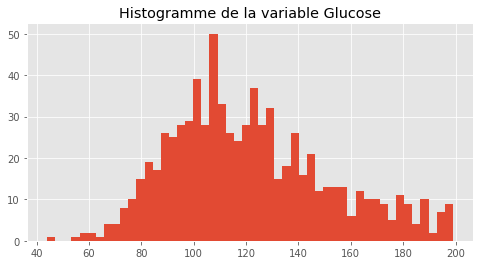

In [135]:
plt.figure(figsize=(8, 4))

df.Glucose.hist(bins=50)

plt.title("Histogramme de la variable Glucose")
plt.plot()

> ## Problème de classification

## Train-Test Split

In [136]:
X = df.drop(columns=["Outcome"])

In [137]:
y = df.Outcome

In [138]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [139]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [140]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
60,2,84.0,72.405184,29.15342,155.548223,32.457464,0.304,21
618,9,112.0,82.000000,24.00000,155.548223,28.200000,1.282,50
346,1,139.0,46.000000,19.00000,83.000000,28.700000,0.654,22
294,0,161.0,50.000000,29.15342,155.548223,21.900000,0.254,65
231,6,134.0,80.000000,37.00000,370.000000,46.200000,0.238,46
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.00000,140.000000,28.600000,0.411,26
106,1,96.0,122.000000,29.15342,155.548223,22.400000,0.207,27
270,10,101.0,86.000000,37.00000,155.548223,45.600000,1.136,38
435,0,141.0,72.405184,29.15342,155.548223,42.400000,0.205,29


## Model and Results

In [141]:
# 1. Instanciation du modèle
# lr = LogisticRegression()
knn = KNeighborsClassifier()
# 2. Entraînement sur le **train set**
# lr.fit(X_train, y_train)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [142]:
# 3. Tester sur le **test set**
# y_pred = lr.predict(X_test)
y_pred = knn.predict(X_test)

In [143]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0])

In [144]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
355    1
534    0
344    0
296    1
462    0
Name: Outcome, Length: 154, dtype: int64

In [145]:
accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

0.6493506493506493

In [146]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.67      0.71        99
           1       0.51      0.62      0.56        55

    accuracy                           0.65       154
   macro avg       0.63      0.64      0.63       154
weighted avg       0.67      0.65      0.66       154



> ## Problème de régression

In [95]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


In [96]:
X = df.drop(columns=["Glucose"])
y = df.Glucose

## Train-Test Split

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [101]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

## Models and Results

In [111]:
from sklearn.svm import SVR

In [118]:
llr = LinearRegression()
# llr = SVR()
llr.fit(X_train, y_train)
y_pred2 = llr.predict(X_test)

In [119]:
y_pred2

array([116.65253064, 109.84222308, 106.98522351, 114.35335946,
       120.25545546, 123.94597619,  96.04071557, 120.45414467,
       110.94727619, 123.99685499, 135.26956684, 124.94355478,
       149.4383951 , 112.13736523,  93.73123034, 133.20001018,
       112.07589161,  99.92904016, 136.04036267, 133.96014564,
       116.33227839, 105.29288174, 110.36216915, 101.44066936,
       111.60275659, 140.87784158, 106.30384262, 100.20713788,
       133.89960304, 110.67132194, 131.5932165 , 150.7567577 ,
       149.0474868 , 138.70384995, 128.93972562, 140.06697388,
       134.06814276, 144.36568336, 122.09296375, 137.70175861,
        97.34910847, 119.38540774, 124.35260951, 136.19358636,
       111.40427658, 146.23594574, 151.5075574 , 111.6494819 ,
       120.00113192, 141.25775627, 106.5334361 , 146.31610248,
       162.51816043, 133.43481627, 113.26614992,  96.8868709 ,
       120.73403692, 109.24755665, 106.93021063, 136.44655057,
       140.4847557 , 112.75114761, 145.14882728, 152.52

In [120]:
y_test

668     98.0
324    112.0
624    108.0
690    107.0
473    136.0
       ...  
355    165.0
534     77.0
344     95.0
296    146.0
462     74.0
Name: Glucose, Length: 154, dtype: float64

In [121]:
llr.score(X_test, y_test)

0.37977432748096196

[]

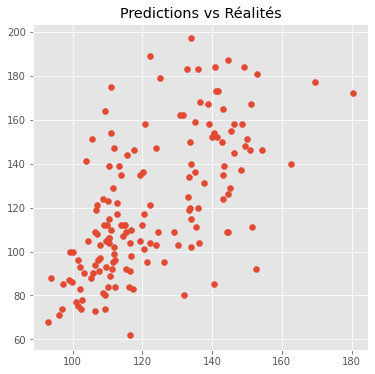

In [122]:
plt.figure(figsize=(6, 6))

plt.scatter(y_pred2, y_test)
plt.title("Predictions vs Réalités")

plt.plot()